# 신경망 모델 구현

In [9]:
## NUMPY -> 수치해석용 라이브러리
## 사이킷런 -> 머신러닝 라이브러리

import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [4]:
# 데이터셋 제작
# x_train, y_train -> 신경망 학습에 쓰이는 데이터와 레이블
# x_test, y_test -> 학습이 끝난 신경망의 성능을 평가하고 실험하는 데 쓰임

n_dim = 2
x_train, y_train = make_blobs(n_samples=50, n_features=n_dim,
                             centers=[[1,1],[-1,-1],[1,-1],[-1,1]],
                             shuffle=True, cluster_std=0.3)

x_test, y_test = make_blobs(n_samples=20, n_features=n_dim,
                           centers=[[1,1],[-1,-1],[1,-1],[-1,1]],
                           shuffle=True, cluster_std=0.3)

# 사이킷런의 make_blobs() 함수를 이용하여 데이터를 2차원 벡터 형태로 제작.
# 학습 데이터셋에는 80개, 실험 데이터셋에는 20개의 2차원 벡터 데이터를 담음.
# x_train과 x_test속 모든 데이터는 0,1,2,3으로 인덱싱이 되어 있음.

In [5]:
# 4개의 레이블을 2개로 합치는 과정

def label_map(y_, from_, to_):
    y=numpy.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0, 1], 0)
y_train = label_map(y_train, [2, 3], 1)
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)

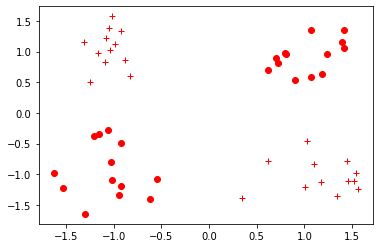

In [13]:
# 데이터 시각화

def vis_Data(x, y = None, c = 'r'):
    if y is None:
        y=[None] * len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*', markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')
            
plt.figure()
vis_Data(x_train, y_train, c='r')
plt.show()

In [14]:
# 넘파이 벡터 형식 데이터를 파이토치 텐서로 변경

x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [16]:
# 신경망 모델 구현

class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet,self).__init__() # input_size = 신경망에 입력되는 데이터의 차원.
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        # 입력된 데이터가 인공 신경망을 통과하면서 거치는 연산(하단)
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, input_tensor):
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output
        # 01.09. 무슨 개소리인지 잘 모르겠음.